In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data(V,LSF)kmeans.csv")
df.head()

,Node,Volts,LSF
0,1,1.0000,0.0000
1,2,0.9970,0.0003
2,3,0.9829,0.0019
3,4,0.9754,0.0014
4,5,0.9680,0.0015


Text(0, 0.5, 'LSF')

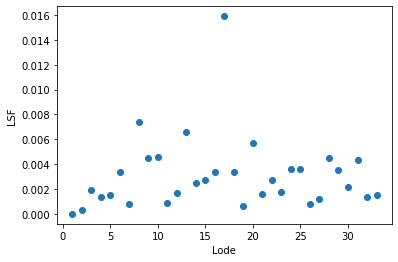

In [3]:
plt.scatter(df.Node,df.iloc[:,2].values)
plt.xlabel('Lode')
plt.ylabel('LSF')

Text(0, 0.5, 'voltage')

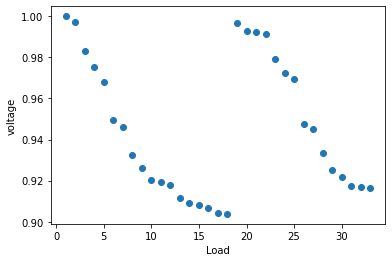

In [4]:
plt.scatter(df.Node,df.iloc[:,1].values)
plt.xlabel('Load')
plt.ylabel('voltage')

In [5]:
data = df.iloc[:,1:3].values              #voltage #LSF

In [6]:
km = KMeans(n_clusters=3)         
y_predicted = km.fit_predict(data)
y_predicted

array([1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0])

In [7]:
df['cluster']=y_predicted
print(df)

    Node   Volts     LSF  cluster
0      1  1.0000  0.0000        1
1      2  0.9970  0.0003        1
2      3  0.9829  0.0019        1
3      4  0.9754  0.0014        1
4      5  0.9680  0.0015        1
5      6  0.9495  0.0034        2
6      7  0.9460  0.0008        2
7      8  0.9323  0.0074        2
8      9  0.9260  0.0045        0
9     10  0.9201  0.0046        0
10    11  0.9193  0.0009        0
11    12  0.9177  0.0017        0
12    13  0.9116  0.0066        0
13    14  0.9093  0.0025        0
14    15  0.9079  0.0027        0
15    16  0.9065  0.0034        0
16    17  0.9044  0.0159        0
17    18  0.9038  0.0034        0
18    19  0.9965  0.0006        1
19    20  0.9929  0.0057        1
20    21  0.9922  0.0016        1
21    22  0.9916  0.0027        1
22    23  0.9793  0.0018        1
23    24  0.9726  0.0036        1
24    25  0.9693  0.0036        1
25    26  0.9476  0.0008        2
26    27  0.9450  0.0012        2
27    28  0.9336  0.0045        2
28    29  0.92

In [8]:
e=km.cluster_centers_
e
cdf=pd.DataFrame(e,columns=['valtage','LSF'])
cdf


,valtage,LSF
0,0.914967,0.003940
1,0.984808,0.002058
2,0.942333,0.003017


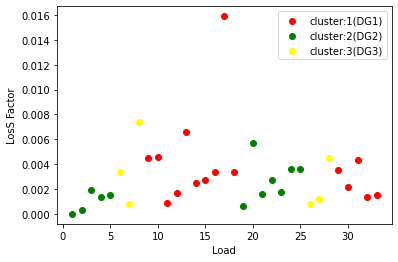

In [9]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Node,df1['LSF'],color='red',label='cluster:1(DG1)')
plt.scatter(df2.Node,df2['LSF'],color='green',label='cluster:2(DG2)')
plt.scatter(df3.Node,df3['LSF'],color='yellow',label='cluster:3(DG3)')

plt.xlabel('Load')
plt.ylabel('LosS Factor')
plt.legend()
plt.show()

In [10]:

sse = []
k_rng = range(1,34)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

In [11]:
#sse

### The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value. The purpose of this figure is to show that the initialization of the centroids is an important step :

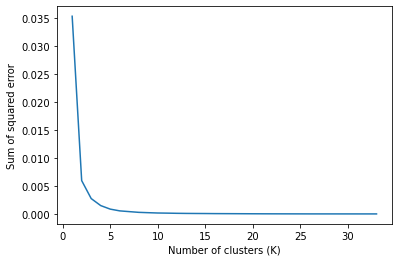

In [12]:

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## hierarchical arrangement clustering algo:

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [70.0, 70.0, 100.0, 100.0],
  [27.5, 27.5, 85.0, 85.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [165.0, 165.0, 184.375, 184.375],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [232.5, 232.5, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [251.25, 251.25, 310.0, 310.0],
  [174.6875, 174.6875, 280.625, 280.625],
  [133.75, 133.75, 227.65625, 227.65625],
  [56.25

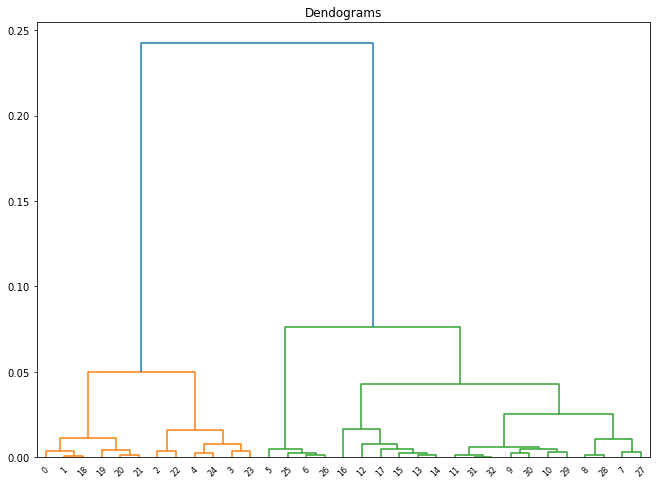

In [13]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering



plt.figure(figsize=(11, 8))
plt.title("Dendograms")
shc.dendrogram(shc.linkage(data, method='ward'))

In [14]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_

In [15]:
labels

array([0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
df = pd.read_csv("data(V,LSF)kmeans.csv")
df.head()

,Node,Volts,LSF
0,1,1.0000,0.0000
1,2,0.9970,0.0003
2,3,0.9829,0.0019
3,4,0.9754,0.0014
4,5,0.9680,0.0015


### lets join the hierarchical cluster in the data-frame:

In [17]:
df["cluster"]=labels
df.head()

,Node,Volts,LSF,cluster
0,1,1.0000,0.0000,0
1,2,0.9970,0.0003,0
2,3,0.9829,0.0019,0
3,4,0.9754,0.0014,0
4,5,0.9680,0.0015,0


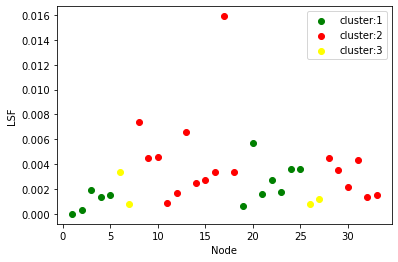

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Node,df1.LSF,color='green',label='cluster:1')
plt.scatter(df2.Node,df2.LSF,color='red',label='cluster:2')
plt.scatter(df3.Node,df3.LSF,color='yellow',label='cluster:3')

plt.xlabel('Node')
plt.ylabel('LSF')
plt.legend()
plt.show()